# **Data Analytics  Competition**
- Nama Tim      : breztech
- Anggota Tim   :
  1. Yusep Fathul Anwar (Ketua)
  2. Fathurrahman Alghozi
  3. Syahrul Mubarak


# **Rumusan Masalah**


1.   Bagaimana tingkat perbandingan antara pagu dan realisasi TKDD di setiap provinsi di Indonesia tahun 2023?
2.   Provinsi mana yang memiliki tingkat realisasi tertinggi dan terendah?
3.   Apakah terdapat hubungan antara realisasi TKDD dan IPM suatu provinsi?
4.   Apa saja faktor-faktor yang memengaruhi IPM di tiap provinsi Indonesia pada tahun 2023?


# **1. DATA UNDERSTANDING**

In [33]:
# 1. Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from google.colab import drive



*   numpy (sebagai np): Library fundamental untuk operasi numerik, terutama dengan array.
*   pandas (sebagai pd): Penting untuk manipulasi dan analisis data, menyediakan DataFrame untuk data terstruktur.
*   matplotlib.pyplot (sebagai plt): Library plotting untuk membuat visualisasi statis.
*  seaborn (sebagai sns): Library visualisasi data statistik berdasarkan Matplotlib, menawarkan plot yang lebih menarik secara estetika dan fungsionalitas yang ditingkatkan untuk grafik statistik.
*   sklearn.preprocessing.StandardScaler: Digunakan untuk menstandardisasi fitur dengan menghapus rata-rata (mean) dan menskalakan ke varians unit, langkah umum dalam pra-pemrosesan machine learning.
*   sklearn.cluster.KMeans: Implementasi algoritma clustering KMeans.
*   sklearn.linear_model.LinearRegression: Implementasi regresi linier.
*   sklearn.model_selection.train_test_split: Utilitas untuk membagi data menjadi subset pelatihan (train) dan pengujian (test) secara acak.
*   sklearn.metrics.mean_squared_error dan r2_score: Metrik untuk mengevaluasi model regresi.
*   google.colab.drive: Module untuk berinteraksi dengan Google Drive dari dalam notebook Colab, biasanya digunakan untuk me-mount Drive dan mengakses file yang tersimpan di sana.

In [34]:
drive.mount('/content/drive')

DATA_PATH = '/content/drive/My Drive/breztech/Dataset Lomba Data Analytics TECHFEST 2025.xlsx'
df = pd.read_excel(DATA_PATH)
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Provinsi,IPM,Pagu TKDD,Realisasi TKDD,Jumlah Penduduk,Anggaran APBN per kapita,Persentase Penduduk Miskin,Produk Domestik Regional Bruto (PDRB) Atas Dasar Harga Berlaku,Produk Domestik Regional Bruto per Kapita HB,Laju Pertumbuhan PDRB atas dasar konstan 2010
0,ACEH,74.70,3.082148e+13,3.107456e+13,5409200.0,5744760.778,14.45,227018.20,41408000,4.23
1,BALI,78.01,1.115211e+13,1.106498e+13,4374300.0,2529543.013,4.25,274358.18,62294000,5.71
2,BANTEN,75.77,1.745338e+13,1.746738e+13,12167000.0,1435635.736,6.17,814122.03,66147000,4.81
3,BENGKULU,74.30,1.057008e+13,1.055979e+13,2059400.0,5127605.128,14.04,96583.09,46300000,4.28
4,DI YOGYAKARTA,81.09,1.035587e+13,1.024129e+13,3712600.0,2758522.329,11.04,180696.04,48360000,5.07


Kode ini menggunakan modul drive dari google.colab untuk menghubungkan Google Drive Anda ke lingkungan runtime Colab saat ini. Ini memungkinkan kita mengakses file yang disimpan di Drive Anda seolah-olah file tersebut berada di sistem file lokal Colab di direktori /content/drive.

In [35]:
df.isnull().sum()

,0
Provinsi,0
IPM,4
Pagu TKDD,1
Realisasi TKDD,1
Jumlah Penduduk,2
Anggaran APBN per kapita,3
Persentase Penduduk Miskin,4
Produk Domestik Regional Bruto (PDRB) Atas Dasar Harga Berlaku,0
Produk Domestik Regional Bruto per Kapita HB,0
Laju Pertumbuhan PDRB atas dasar konstan 2010,0


df.isnull().sum() menghitung jumlah nilai yang hilang (missing values) di setiap kolom DataFrame df

In [36]:
for col in df.columns:
  print(f"Unique values for column: {col}")
  display(df[col].unique())
  print("\n")

Unique values for column: Provinsi


array(['ACEH', 'BALI', 'BANTEN', 'BENGKULU', 'DI YOGYAKARTA',
       'DKI JAKARTA', 'GORONTALO', 'JAMBI', 'JAWA BARAT', 'JAWA TENGAH',
       'JAWA TIMUR', 'KALIMANTAN BARAT', 'KALIMANTAN SELATAN',
       'KALIMANTAN TENGAH', 'KALIMANTAN TIMUR', 'KALIMANTAN UTARA',
       'KEP. BANGKA BELITUNG', 'KEP. RIAU', 'LAMPUNG', 'MALUKU',
       'MALUKU UTARA', 'NUSA TENGGARA BARAT', 'NUSA TENGGARA TIMUR',
       'PAPUA', 'PAPUA BARAT', 'PAPUA BARAT DAYA', 'PAPUA PEGUNUNGAN',
       'PAPUA SELATAN', 'PAPUA TENGAH', 'RIAU', 'SULAWESI BARAT',
       'SULAWESI SELATAN', 'SULAWESI TENGAH', 'SULAWESI TENGGARA',
       'SULAWESI UTARA', 'SUMATERA BARAT', 'SUMATERA SELATAN',
       'SUMATERA UTARA'], dtype=object)



Unique values for column: IPM


array([74.7 , 78.01, 75.77, 74.3 , 81.09, 83.55, 71.25, 73.73, 74.24,
       73.39, 74.65, 70.47, 74.66, 78.2 , 72.88, 74.09, 79.08, 72.48,
       72.75, 70.98, 72.37, 68.4 , 63.01, 67.47,   nan, 74.95, 69.8 ,
       74.6 , 71.66, 72.94, 75.04, 75.64, 73.18, 75.13])



Unique values for column: Pagu TKDD


array([3.082148e+13, 1.115211e+13, 1.745338e+13, 1.057008e+13,
       1.035587e+13, 2.469499e+13, 6.172420e+12, 1.523207e+13,
       7.132176e+13, 6.712969e+13, 8.200830e+13, 2.079747e+13,
       3.163078e+13, 2.769023e+13, 5.164347e+13, 1.099441e+13,
       7.497480e+12, 9.246690e+12, 2.150812e+13, 1.213282e+13,
       1.420022e+13, 1.742235e+13, 2.426085e+13, 1.221171e+13,
       1.401324e+13, 1.016348e+13, 1.354314e+13, 8.094830e+12,
       1.439523e+13, 2.447168e+13, 6.921800e+12, 3.031335e+13,
       1.974932e+13, 2.046079e+13,          nan, 2.042998e+13,
       3.386521e+13, 4.272587e+13])



Unique values for column: Realisasi TKDD


array([3.107456e+13, 1.106498e+13, 1.746738e+13, 1.055979e+13,
       1.024129e+13, 2.508018e+13, 6.155410e+12, 1.535267e+13,
       7.103169e+13, 6.677206e+13, 8.192189e+13, 2.109132e+13,
       3.498028e+13, 2.886221e+13, 5.731468e+13, 1.159327e+13,
       7.454150e+12, 1.015074e+13, 2.152800e+13, 1.204938e+13,
       1.430205e+13, 1.738705e+13, 2.412650e+13, 1.151835e+13,
       1.439637e+13, 1.013204e+13, 1.282176e+13, 7.658020e+12,
       1.494127e+13, 2.552220e+13, 6.877950e+12, 3.021665e+13,
       1.994741e+13, 2.084041e+13,          nan, 2.026070e+13,
       3.543317e+13, 4.273261e+13])



Unique values for column: Jumlah Penduduk


array([ 5409200.,  4374300., 12167000.,  2059400.,  3712600., 10640000.,
        1198400.,  3633200., 49306800., 37180400., 41230000., 55497000.,
       41702000.,  2737200.,  3856800.,   720100.,  1492000.,  2121500.,
        4496600.,  1895100.,  1318500.,  5474000.,  5481800.,  4429700.,
        1168400.,  6113520.,       nan,  1351659.,  6555800.,  1458900.,
        9260100.,  3051200.,  2704600.,  2660800.,  5677600.,  8647300.,
       15180500.])



Unique values for column: Anggaran APBN per kapita


array([ 5744760.778 ,  2529543.013 ,  1435635.736 ,  5127605.128 ,
        2758522.329 ,  2357159.774 ,  5136356.809 ,  4225660.575 ,
        1440606.367 ,  1795894.073 ,  1986948.581 ,   380044.3267,
         838815.4045, 10544428.61  , 14860682.43  , 16099527.84  ,
        4996079.088 ,  4784699.505 ,  4787617.311 ,  6358176.35  ,
       10847212.74  ,  3176297.041 ,  4401200.336 ,  2600255.096 ,
       12321439.58  ,  1657316.898 ,           nan, 11054023.24  ,
        3893071.784 ,  4714476.66  ,  3263101.91  ,  6537562.271 ,
        7705542.409 ,  3568532.479 ,  4097599.251 ,  2814967.228 ])



Unique values for column: Persentase Penduduk Miskin


array([14.45, 4.25, 6.17, 14.04, 11.04, 4.44, 15.15, 7.58, 7.62, 10.77,
       'o', 6.71, 4.29, 5.11, 6.11, 6.45, 4.52, 5.69, 11.11, 16.42, 6.46,
       13.85, 19.96, 26.03, 20.49, nan, 6.68, 11.49, 8.7, 12.41, 11.43,
       7.38, 5.95, 11.78, 8.15], dtype=object)



Unique values for column: Produk Domestik Regional Bruto (PDRB) Atas Dasar Harga Berlaku


array([ 227018.2 ,  274358.18,  814122.03,   96583.09,  180696.04,
       3443026.23,   51366.74,  293780.01, 2625225.72, 1695621.57,
       2953546.98,  274468.58,  269192.02,  208783.35,  843571.25,
        147278.62,  102526.77,  331644.52,  448850.64,   58487.79,
         85143.13,  166395.45,  128522.85,   81731.73,   61576.37,
         36104.57,   24433.99,   31357.75,  150377.18, 1026472.05,
         58572.05,  652648.09,  347139.01,  176179.9 ,  171969.42,
        312769.38,  629168.67, 1050995.41])



Unique values for column: Produk Domestik Regional Bruto per Kapita HB


array([ 41408000,  62294000,  66147000,  46300000,  48360000, 322619000,
        42341000,  79850000,  52652000,  45167000,  71122000,  48809000,
        63754000,  75271000, 215761000, 201749000,  67813000, 154065000,
        48191000,  30455000,  63675000,  29926000,  23078000,  78055000,
       108110000,  58450000,  16870000,  58677000, 103508000, 154522000,
        39547000,  69710000, 112461000,  64088000,  64131000,  54327000,
        71958000,  68306000])



Unique values for column: Laju Pertumbuhan PDRB atas dasar konstan 2010


array([ 4.23,  5.71,  4.81,  4.28,  5.07,  4.96,  4.5 ,  4.67,  5.  ,
        4.97,  4.95,  4.46,  4.84,  4.14,  6.22,  4.94,  4.38,  5.16,
        4.55,  5.21, 20.49,  1.8 ,  3.47,  4.22,  5.18,  1.82,  4.78,
        5.95,  4.21,  5.23,  4.51, 11.91,  5.35,  5.48,  4.62,  5.08,
        5.01])

Kode ini mengulang (loop) setiap kolom dalam DataFrame df. Untuk setiap kolom, kode ini mencetak nama kolom dan kemudian menampilkan semua nilai unik yang ada di dalam kolom tersebut menggunakan df[col].unique().

In [37]:
print("Jumlah Missing Value:")
print(df.isnull().sum())

print("\nTipe Data:")
print(df.dtypes)

print("\nCek Duplikat:")
print(df.duplicated().sum())


Jumlah Missing Value:
Provinsi                                                          0
IPM                                                               4
Pagu TKDD                                                         1
Realisasi TKDD                                                    1
Jumlah Penduduk                                                   2
Anggaran APBN per kapita                                          3
Persentase Penduduk Miskin                                        4
Produk Domestik Regional Bruto (PDRB) Atas Dasar Harga Berlaku    0
Produk Domestik Regional Bruto per Kapita HB                      0
Laju Pertumbuhan PDRB atas dasar konstan 2010                     0
dtype: int64

Tipe Data:
Provinsi                                                           object
IPM                                                               float64
Pagu TKDD                                                         float64
Realisasi TKDD                                     





*   Mencetak judul "Cek Duplikat:" diikuti dengan  jumlah baris yang sepenuhnya duplikat dalam DataFrame df (menggunakan df.duplicated().sum()).
*   Mencetak judul "Jumlah Missing Value:" diikuti dengan jumlah nilai yang hilang di setiap kolom DataFrame df (menggunakan df.isnull().sum()).
*   Mencetak judul "Tipe Data:" diikuti dengan tipe data dari setiap kolom dalam DataFrame df (menggunakan df.dtypes).



# **2. DATA CLEANING**

In [38]:
# Convert 'Persentase Penduduk Miskin' to numeric, coercing errors
df['Persentase Penduduk Miskin'] = pd.to_numeric(df['Persentase Penduduk Miskin'], errors='coerce')

# Imputasi Missing Values
imputation = {
    'IPM': df['IPM'].mean(),
    'Pagu TKDD': df['Pagu TKDD'].median(),
    'Realisasi TKDD': df['Realisasi TKDD'].median(),
    'Jumlah Penduduk': df['Jumlah Penduduk'].median(),
    'Anggaran APBN per kapita': df['Anggaran APBN per kapita'].median(),
    'Persentase Penduduk Miskin': df['Persentase Penduduk Miskin'].mean()
}

for col, value in imputation.items():
    df[col] = df[col].fillna(value)

Kode ini melakukan imputasi (pengisian) nilai-nilai yang hilang di kolom-kolom tertentu (IPM, Pagu TKDD, Jumlah Penduduk, Anggaran APBN, Persentase penduduk miskin) dalam DataFrame df. Nilai yang hilang diisi dengan nilai rata-rata (mean) atau median dari kolom masing-masing, sesuai dengan yang didefinisikan di dictionary imputation.

In [39]:
df.columns = (
    df.columns
    .str.strip()
    .str.lower()
    .str.replace(' ', '_')
    .str.replace('(', '', regex=False)
    .str.replace(')', '', regex=False)
)


Kode ini membersihkan dan menstandardisasi nama-nama kolom dalam DataFrame df dengan menghapus spasi di awal/akhir, mengubah huruf menjadi kecil, mengganti spasi dengan garis bawah, dan menghapus tanda kurung.

In [40]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 10 columns):
 #   Column                                                        Non-Null Count  Dtype  
---  ------                                                        --------------  -----  
 0   provinsi                                                      38 non-null     object 
 1   ipm                                                           38 non-null     float64
 2   pagu_tkdd                                                     38 non-null     float64
 3   realisasi_tkdd                                                38 non-null     float64
 4   jumlah_penduduk                                               38 non-null     float64
 5   anggaran_apbn_per_kapita                                      38 non-null     float64
 6   persentase_penduduk_miskin                                    38 non-null     float64
 7   produk_domestik_regional_bruto_pdrb_atas_dasar_harga_berlaku  38 non-null

,0
provinsi,0
ipm,0
pagu_tkdd,0
realisasi_tkdd,0
jumlah_penduduk,0
anggaran_apbn_per_kapita,0
persentase_penduduk_miskin,0
produk_domestik_regional_bruto_pdrb_atas_dasar_harga_berlaku,0
produk_domestik_regional_bruto_per_kapita_hb,0
laju_pertumbuhan_pdrb_atas_dasar_konstan_2010,0


kode ini memberikan hasil bahwa sudah tidak ada missing

In [41]:
# Mapping dari snake_case ke nama singkat
rename_cols = {
    'provinsi': 'provinsi',
    'ipm': 'ipm',
    'pagu_tkdd': 'pagu_tkdd',
    'realisasi_tkdd': 'realisasi_tkdd',
    'jumlah_penduduk': 'penduduk',
    'anggaran_apbn_per_kapita': 'apbn_perkapita',
    'persentase_penduduk_miskin': 'persen_miskin',
    'produk_domestik_regional_bruto_pdrb_atas_dasar_harga_berlaku': 'pdrb_adhb',
    'produk_domestik_regional_bruto_per_kapita_hb': 'pdrb_perkapita_hb',
    'laju_pertumbuhan_pdrb_atas_dasar_konstan_2010': 'growth_pdrb_adhk_2010'
}

# Rename dataframe
df = df.rename(columns=rename_cols)


Kode ini mengganti nama beberapa kolom dalam DataFrame df menggunakan dictionary rename_cols. Nama kolom yang panjang diubah menjadi nama yang lebih singkat dan mudah dibaca sesuai dengan mapping yang diberikan.

In [42]:
print(df.columns.tolist())


['provinsi', 'ipm', 'pagu_tkdd', 'realisasi_tkdd', 'penduduk', 'apbn_perkapita', 'persen_miskin', 'pdrb_adhb', 'pdrb_perkapita_hb', 'growth_pdrb_adhk_2010']


Melihat isi kolom dataset tersebut menjadi dalam 1 list

In [43]:
data_dict = pd.DataFrame([
    ['provinsi', 'provinsi', 'Nama wilayah administratif'],
    ['ipm', 'ipm', 'Indeks Pembangunan Manusia'],
    ['pagu_tkdd', 'pagu_tkdd', 'Pagu TKDD'],
    ['realisasi_tkdd', 'realisasi_tkdd', 'Realisasi TKDD'],
    ['jumlah_penduduk', 'penduduk', 'Total populasi'],
    ['anggaran_apbn_per_kapita', 'apbn_perkapita', 'Anggaran per kapita'],
    ['persentase_penduduk_miskin', 'persen_miskin', 'Persentase miskin (%)'],
    ['produk_domestik_regional_bruto_pdrb_atas_dasar_harga_berlaku', 'pdrb_adhb', 'PDRB harga berlaku'],
    ['produk_domestik_regional_bruto_per_kapita_hb', 'pdrb_perkapita_hb', 'PDRB per kapita'],
    ['laju_pertumbuhan_pdrb_atas_dasar_konstan_2010', 'growth_pdrb_adhk_2010', 'Pertumbuhan ekonomi (ADHK)']
], columns=['Kolom Asli', 'Kolom Singkat', 'Deskripsi'])

#data_dict.to_csv('data_dictionary.csv', index=False)
data_dict


,Kolom Asli,Kolom Singkat,Deskripsi
0,provinsi,provinsi,Nama wilayah administratif
1,ipm,ipm,Indeks Pembangunan Manusia
2,pagu_tkdd,pagu_tkdd,Pagu TKDD
3,realisasi_tkdd,realisasi_tkdd,Realisasi TKDD
4,jumlah_penduduk,penduduk,Total populasi
5,anggaran_apbn_per_kapita,apbn_perkapita,Anggaran per kapita
6,persentase_penduduk_miskin,persen_miskin,Persentase miskin (%)
7,produk_domestik_regional_bruto_pdrb_atas_dasar...,pdrb_adhb,PDRB harga berlaku
8,produk_domestik_regional_bruto_per_kapita_hb,pdrb_perkapita_hb,PDRB per kapita
9,laju_pertumbuhan_pdrb_atas_dasar_konstan_2010,growth_pdrb_adhk_2010,Pertumbuhan ekonomi (ADHK)


Kode ini membuat sebuah DataFrame baru bernama data_dict yang berfungsi sebagai kamus data (data dictionary). DataFrame ini berisi tiga kolom: 'Kolom Asli' (nama kolom sebelum diubah), 'Kolom Singkat' (nama kolom setelah diubah), dan 'Deskripsi' (penjelasan singkat tentang makna setiap kolom).

# **3. FEATURE ENGINEERING**

In [44]:
# Membuat fitur penting
df['persentase_realisasi'] = (df['realisasi_tkdd'] / df['pagu_tkdd']) * 100



def klasifikasi_realisasi(persen):
    if persen < 90:
        return '< 90%'
    elif 90 <= persen <= 100:
        return '90-100%'
    else:
        return '> 100%'

df['kategori_realisasi'] = df['persentase_realisasi'].apply(klasifikasi_realisasi)

df['ipm_per_miskin'] = df['ipm'] / df['persen_miskin']





*   Menghitung persentase_realisasi TKDD dengan membagi realisasi dengan pagu dan mengalikan 100.
*   Membuat fungsi klasifikasi_realisasi untuk mengkategorikan persentase realisasi menjadi 'Di bawah 90%', '90-100%', atau 'Di atas 100%'.
*   Menerapkan fungsi tersebut untuk membuat kolom baru kategori_realisasi.
*   Menghitung rasio ipm_per_miskin dengan membagi IPM dengan persentase penduduk miskin.





# **4. ANALISIS STATISTIK**

In [45]:
cor_realisasi = df.corr(numeric_only=True)['realisasi_tkdd'].sort_values(ascending=False)
print("Korelasi terhadap Realisasi TKDD:\n", cor_realisasi)

# Korelasi dengan IPM
cor_ipm = df.corr(numeric_only=True)['ipm'].sort_values(ascending=False)
print("\nKorelasi terhadap IPM:\n", cor_ipm)

Korelasi terhadap Realisasi TKDD:
 realisasi_tkdd           1.000000
pagu_tkdd                0.998200
pdrb_adhb                0.732786
penduduk                 0.675060
persentase_realisasi     0.212982
ipm                      0.156987
pdrb_perkapita_hb        0.080284
ipm_per_miskin           0.057749
growth_pdrb_adhk_2010   -0.029456
apbn_perkapita          -0.137044
persen_miskin           -0.153592
Name: realisasi_tkdd, dtype: float64

Korelasi terhadap IPM:
 ipm                      1.000000
ipm_per_miskin           0.639770
pdrb_perkapita_hb        0.446258
pdrb_adhb                0.420602
persentase_realisasi     0.312076
realisasi_tkdd           0.156987
pagu_tkdd                0.143037
penduduk                 0.016516
growth_pdrb_adhk_2010   -0.076670
apbn_perkapita          -0.128737
persen_miskin           -0.693981
Name: ipm, dtype: float64


Kode ini menghitung dan mencetak koefisien korelasi Pearson antara realisasi_tkdd dan variabel numerik lainnya, serta antara ipm dan variabel numerik lainnya dalam DataFrame df. Hasilnya menunjukkan seberapa kuat dan ke arah mana (positif atau negatif) hubungan linier antara variabel-variabel tersebut.


*   Korelasi terhadap Realisasi TKDD: Menunjukkan bahwa pagu_tkdd memiliki korelasi yang sangat kuat dan positif dengan realisasi_tkdd, yang masuk akal karena realisasi berasal dari pagu. pdrb_adhb dan penduduk juga berkorelasi positif cukup kuat.
*   Korelasi terhadap IPM: Menunjukkan bahwa ipm_per_miskin memiliki korelasi positif terkuat dengan ipm. pdrb_perkapita_hb dan pdrb_adhb juga berkorelasi positif cukup kuat. Sebaliknya, persen_miskin memiliki korelasi negatif yang kuat dengan ipm.





In [46]:
for col in df.select_dtypes(include='number').columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]

    print(f'  Kolom: {col}')
    print(f'  Jumlah outlier: {outliers.shape[0]}')
    print(f'  Batas bawah: {lower_bound:.2f}, Batas atas: {upper_bound:.2f}')
    print()


  Kolom: ipm
  Jumlah outlier: 6
  Batas bawah: 69.04, Batas atas: 78.40

  Kolom: pagu_tkdd
  Jumlah outlier: 4
  Batas bawah: -11918911250000.00, Batas atas: 50257618750000.00

  Kolom: realisasi_tkdd
  Jumlah outlier: 4
  Batas bawah: -13198111250000.00, Batas atas: 52762398750000.00

  Kolom: penduduk
  Jumlah outlier: 5
  Batas bawah: -6545825.00, Batas atas: 16926575.00

  Kolom: apbn_perkapita
  Jumlah outlier: 6
  Batas bawah: -1789434.92, Batas atas: 10021916.61

  Kolom: persen_miskin
  Jumlah outlier: 3
  Batas bawah: -1.43, Batas atas: 19.59

  Kolom: pdrb_adhb
  Jumlah outlier: 4
  Batas bawah: -630961.22, Batas atas: 1313119.39

  Kolom: pdrb_perkapita_hb
  Jumlah outlier: 5
  Batas bawah: 4544625.00, Batas atas: 121047625.00

  Kolom: growth_pdrb_adhk_2010
  Jumlah outlier: 4
  Batas bawah: 3.24, Batas atas: 6.34

  Kolom: persentase_realisasi
  Jumlah outlier: 7
  Batas bawah: 95.96, Batas atas: 105.28

  Kolom: ipm_per_miskin
  Jumlah outlier: 0
  Batas bawah: -1.65, B

Kode ini mengidentifikasi dan menghitung jumlah outlier (nilai pencilan) di setiap kolom numerik dalam DataFrame df menggunakan metode IQR (Interquartile Range). Untuk setiap kolom, kode ini mencetak nama kolom, jumlah outlier yang terdeteksi, serta batas bawah dan batas atas yang digunakan untuk menentukan outlier.

# **5. VISUALISASI**

## 1. Bagaimana tingkat perbandingan antara pagu dan realisasi TKDD di setiap provinsi di Indonesia tahun 2023?

/tmp/ipython-input-3529787992.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


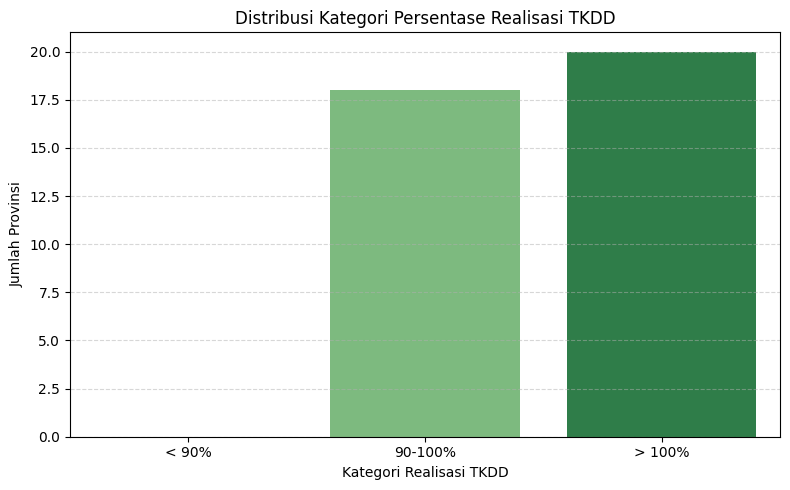

In [47]:
plt.figure(figsize=(8, 5))
sns.countplot(
    data=df,
    x='kategori_realisasi',
    palette='Greens',
    order=['< 90%', '90-100%', '> 100%']
)
plt.title('Distribusi Kategori Persentase Realisasi TKDD')
plt.xlabel('Kategori Realisasi TKDD')
plt.ylabel('Jumlah Provinsi')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

Bar chart ini menampilkan jumlah provinsi yang masuk ke dalam tiga kategori realisasi TKDD berdasarkan persentasenya: "Di bawah 90%", "90-100%", dan "Di atas 100%". Bar chart ini memberikan gambaran umum tentang seberapa banyak provinsi yang berhasil mencapai target realisasi, kurang dari target, atau bahkan melebihi target.

Secara keseluruhan, visualisasi ini menunjukkan bahwa sebagian besar provinsi di Indonesia pada tahun 2023 memiliki tingkat realisasi TKDD yang sangat baik, dengan mayoritas berhasil merealisasikan anggaran sesuai atau bahkan melebihi target. Hanya sejumlah kecil provinsi yang realisasinya di bawah 90%.

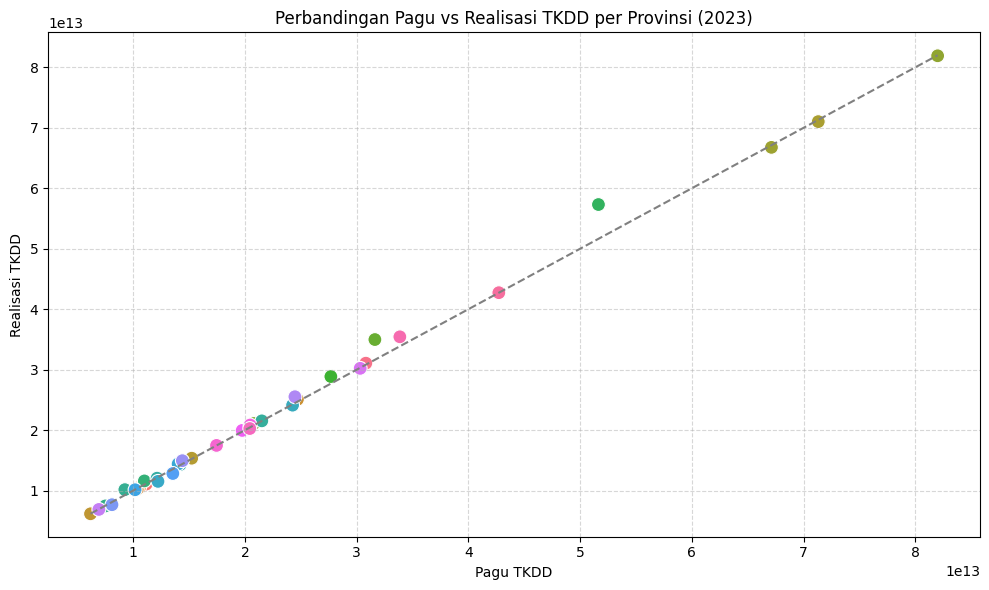

In [48]:
# Perbandingan Pagu Vs Realisasi TKDD per Provinsi (2023)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='pagu_tkdd', y='realisasi_tkdd', hue='provinsi', s=100, legend=False)
plt.plot([df['pagu_tkdd'].min(), df['pagu_tkdd'].max()],
         [df['pagu_tkdd'].min(), df['pagu_tkdd'].max()], '--', color='gray')
plt.title('Perbandingan Pagu vs Realisasi TKDD per Provinsi (2023)')
plt.xlabel('Pagu TKDD')
plt.ylabel('Realisasi TKDD')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


Scatter plot ini membandingkan jumlah Pagu (anggaran yang direncanakan) dengan Realisasi (anggaran yang benar-benar digunakan) TKDD untuk setiap provinsi. Garis diagonal putus-putus merepresentasikan kondisi di mana Pagu sama dengan Realisasi.

- Titik-titik yang berada di atas garis diagonal menunjukkan provinsi yang realisasi TKDD-nya melebihi Pagu.
- Titik-titik yang berada di bawah garis diagonal menunjukkan provinsi yang realisasi TKDD-nya di bawah Pagu.
- Titik-titik yang dekat dengan garis diagonal menunjukkan realisasi yang mendekati target Pagu.

Meskipun ada beberapa titik yang berada di atas garis diagonal (menunjukkan realisasi di atas 100%), secara umum plot ini menunjukkan tren positif di mana sebagian besar provinsi memiliki realisasi TKDD yang cukup dekat dengan pagu, bahkan cenderung sedikit di atas. Ini konsisten dengan temuan dari bar chart kategori realisasi sebelumnya yang menunjukkan banyak provinsi di kategori '90-100%' dan '> 100%'.

## 2. Provinsi mana yang memiliki tingkat realisasi tertinggi dan terendah?

/tmp/ipython-input-446930455.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_realisasi, x='persentase_realisasi', y='provinsi', palette='Greens_r')


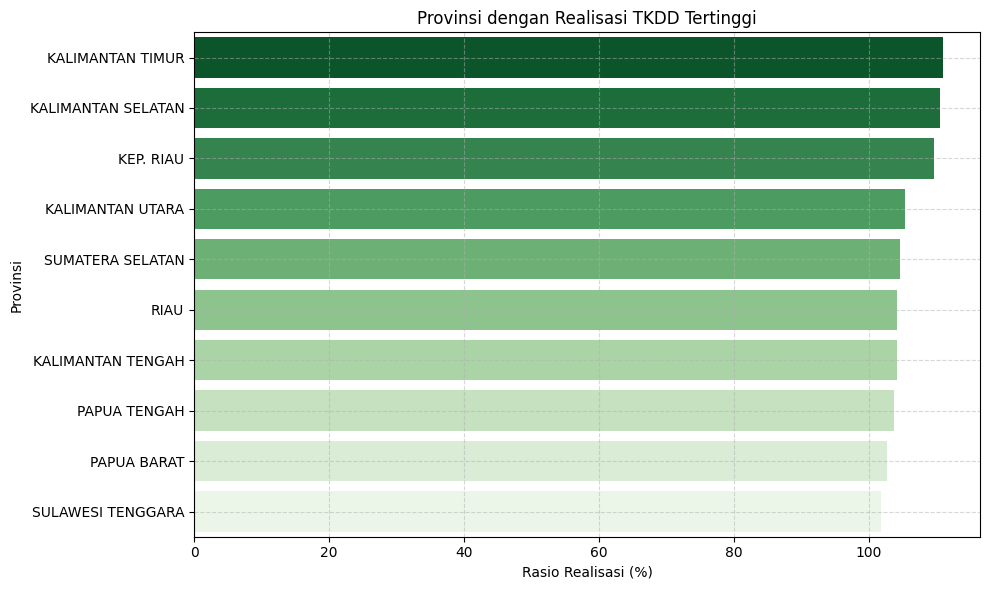

In [49]:
top_realisasi = df.sort_values('persentase_realisasi', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(data=top_realisasi, x='persentase_realisasi', y='provinsi', palette='Greens_r')
plt.title('Provinsi dengan Realisasi TKDD Tertinggi')
plt.xlabel('Rasio Realisasi (%)')
plt.ylabel('Provinsi')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

- Plot ini menampilkan 10 provinsi dengan persentase realisasi TKDD tertinggi, diurutkan dari yang tertinggi ke terendah.
- Sumbu horizontal (X) menunjukkan Rasio Realisasi dalam persentase (%), dan sumbu vertikal (Y) menunjukkan nama Provinsi.
- Bar terpanjang di bagian atas menunjukkan provinsi dengan persentase realisasi TKDD tertinggi, dan bar semakin pendek ke bawah menunjukkan provinsi dengan persentase yang sedikit lebih rendah dalam daftar 10 teratas.
- Kalimantan Timur menjadi daerah yang menjadi top 1 provinsi dengan realisasi TKDD tertinggi

Meskipun label persentase spesifik tidak ditampilkan langsung pada bar, kita bisa melihat bahwa provinsi-provinsi di bagian atas daftar (seperti Kalimantan Timur, Kalimantan Selatan, Kep. Riau, dll.) memiliki persentase realisasi yang melebihi 100%. Ini menunjukkan kinerja penyerapan anggaran yang sangat baik di provinsi-provinsi tersebut.

/tmp/ipython-input-592402048.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=bottom_realisasi, x='persentase_realisasi', y='provinsi', palette='Reds_r')


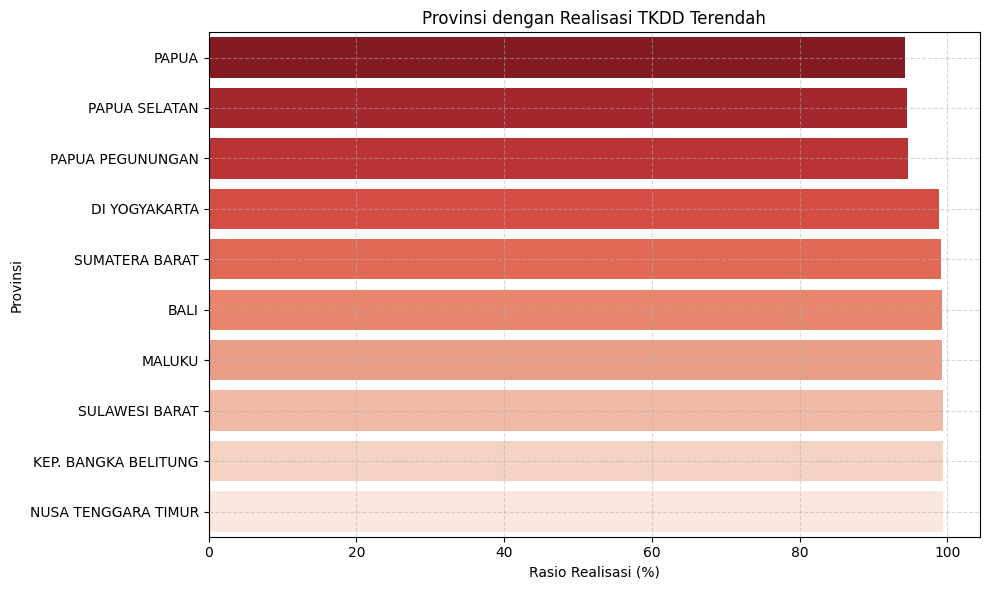

In [50]:
# Mengurutkan dari rasio realisasi terendah ke tertinggi
bottom_realisasi = df.sort_values('persentase_realisasi', ascending=True).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(data=bottom_realisasi, x='persentase_realisasi', y='provinsi', palette='Reds_r')
plt.title('Provinsi dengan Realisasi TKDD Terendah')
plt.xlabel('Rasio Realisasi (%)')
plt.ylabel('Provinsi')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

- Plot ini menampilkan 10 provinsi dengan persentase realisasi TKDD terendah, diurutkan dari yang terendah ke tertinggi. Palet warna merah ('Reds_r') digunakan untuk menyoroti provinsi dengan realisasi yang kurang baik.
- Sumbu horizontal (X) menunjukkan Rasio Realisasi dalam persentase (%), dan sumbu vertikal (Y) menunjukkan nama Provinsi.
- Bar terpanjang di bagian bawah menunjukkan provinsi dengan persentase realisasi TKDD terendah, dan bar semakin pendek ke atas menunjukkan provinsi dengan persentase yang sedikit lebih tinggi dalam daftar 10 terbawah.
- Papua menjadi daerah yang menjadi top 1 provinsi dengan Realisasi TKDD Terendah

Meskipun bar-bar ini menunjukkan realisasi terendah, perlu dicatat bahwa bahkan provinsi dengan realisasi terendah dalam daftar ini masih memiliki persentase realisasi di atas 90%. Ini kembali menekankan temuan sebelumnya bahwa secara umum, tingkat realisasi TKDD di sebagian besar provinsi pada tahun 2023 cukup tinggi.

## 3. Apa kemungkinan faktor-faktor yang mempengaruhi tinggi-rendahnya realisasi TKDD?

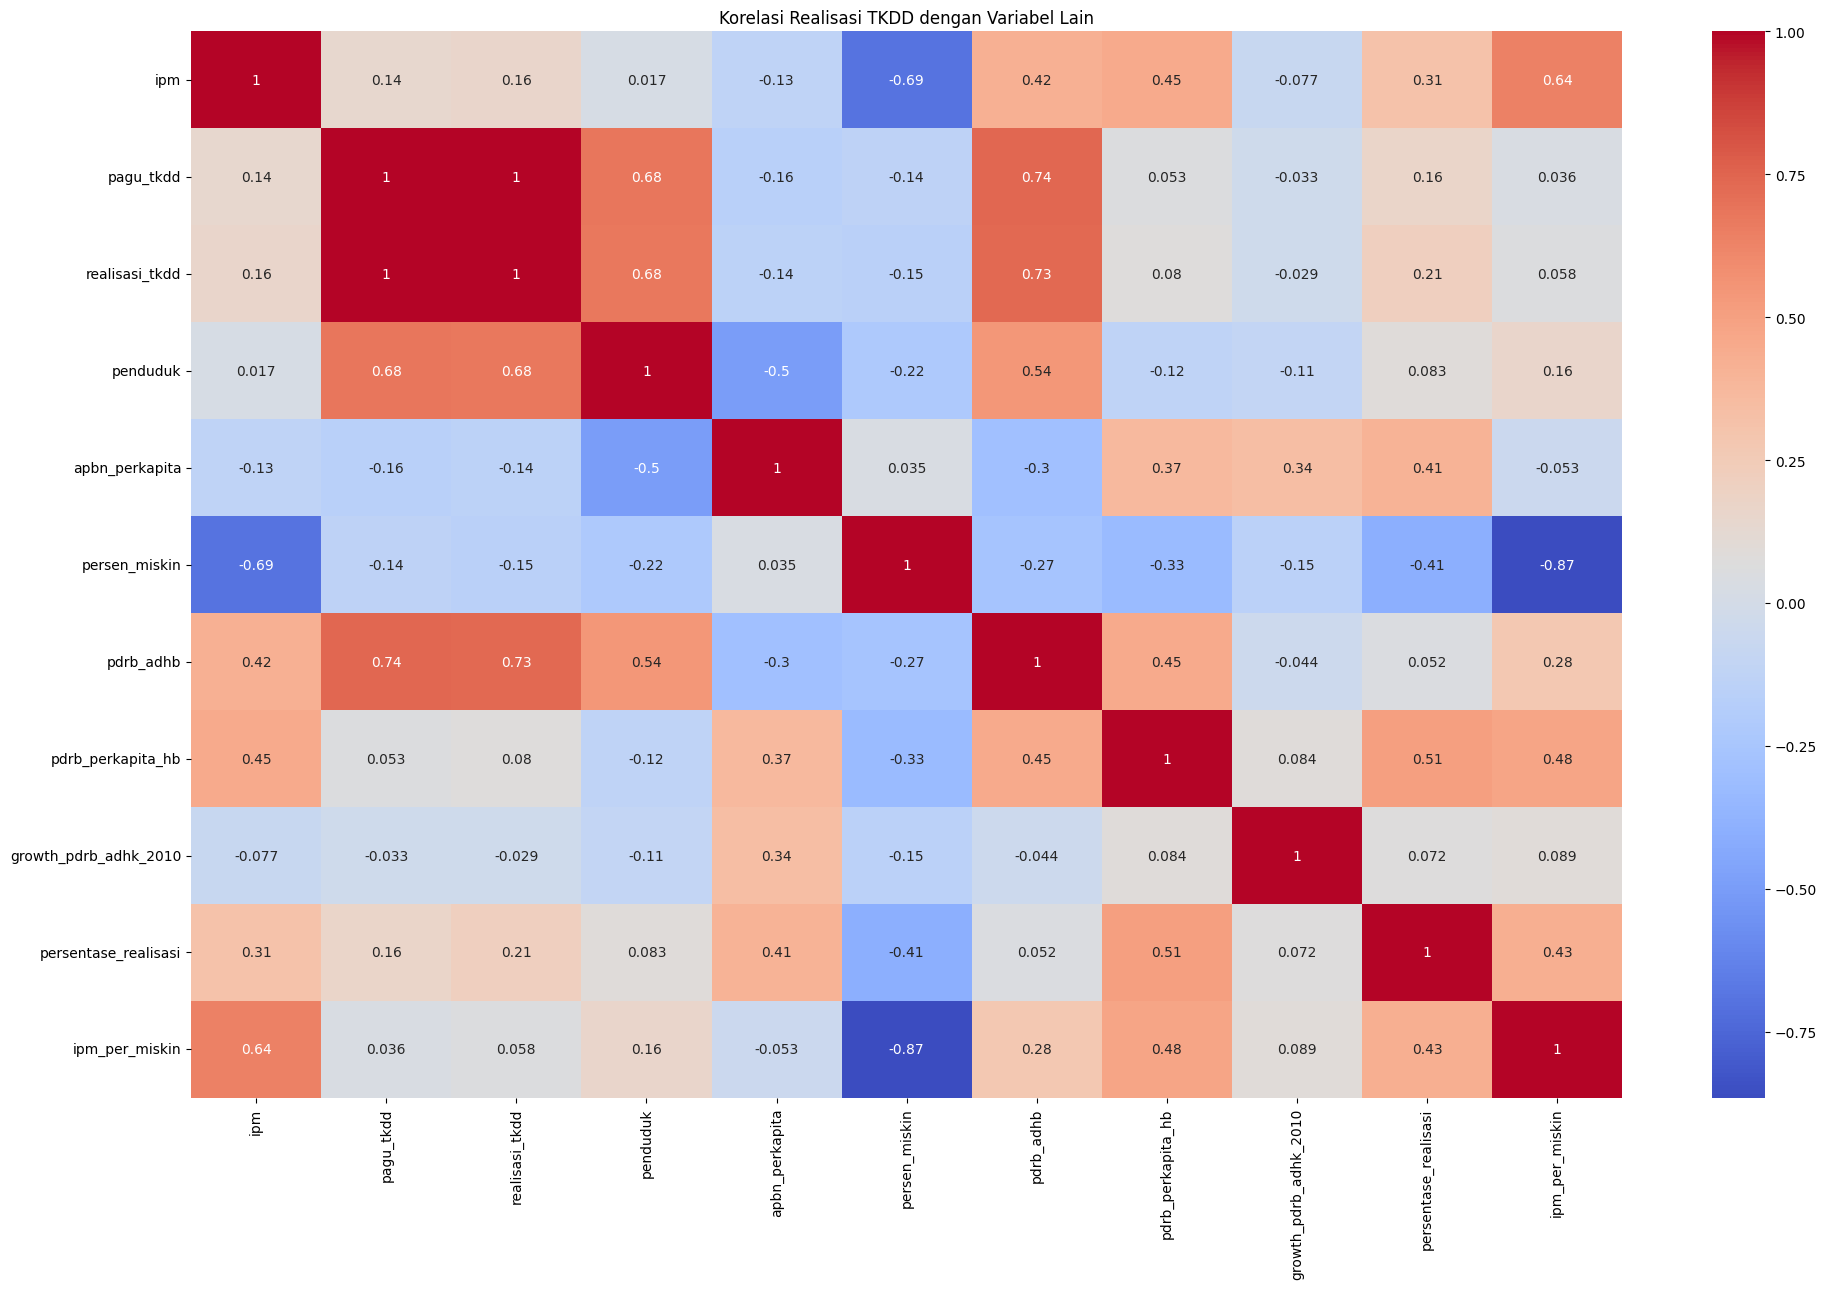

In [51]:
plt.figure(figsize=(20, 13))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Korelasi Realisasi TKDD dengan Variabel Lain')
plt.tight_layout()
plt.show()


- Warna: Warna pada setiap sel menunjukkan kekuatan dan arah korelasi antara dua variabel. Warna merah cenderung menunjukkan korelasi negatif (ketika satu variabel naik, yang lain cenderung turun), sementara warna biru cenderung menunjukkan korelasi positif (ketika satu variabel naik, yang lain juga cenderung naik). Intensitas warna menunjukkan kekuatan korelasi; warna yang lebih gelap (biru tua atau merah tua) menunjukkan korelasi yang lebih kuat, sementara warna yang lebih terang menunjukkan korelasi yang lebih lemah.
- Angka: Angka di dalam setiap sel adalah koefisien korelasi Pearson, yang nilainya berkisar antara -1 hingga +1.
  +1: Korelasi positif sempurna.
  0: Tidak ada korelasi linier.
  -1: Korelasi negatif sempurna.
Fokus pada baris atau kolom 'realisasi_tkdd', kita bisa melihat korelasinya dengan variabel lain:

- pagu_tkdd: Memiliki korelasi yang sangat kuat dan positif (nilai mendekati 1). Ini sangat wajar karena realisasi anggaran berasal dari pagu anggaran.
- pdrb_adhb (Produk Domestik Regional Bruto Atas Dasar Harga Berlaku) dan penduduk: Memiliki korelasi positif yang cukup kuat dengan realisasi TKDD. Ini mungkin menunjukkan bahwa provinsi dengan ekonomi yang lebih besar atau populasi yang lebih padat cenderung menerima dan merealisasikan anggaran TKDD yang lebih besar.
- persentase_realisasi: Memiliki korelasi positif yang moderat. Ini juga logis karena persentase realisasi dihitung dari realisasi TKDD.
- ipm (Indeks Pembangunan Manusia), pdrb_perkapita_hb (Produk Domestik Regional Bruto per Kapita HB), dan ipm_per_miskin (Rasio IPM per Persentase Miskin): Memiliki korelasi positif yang lemah dengan realisasi TKDD.
- growth_pdrb_adhk_2010 (Laju Pertumbuhan PDRB atas dasar konstan 2010): Memiliki korelasi negatif yang sangat lemah, mendekati nol.
- apbn_perkapita (Anggaran APBN per kapita) dan persen_miskin (Persentase Penduduk Miskin): Memiliki korelasi negatif yang lemah dengan realisasi TKDD. Ini menunjukkan bahwa provinsi dengan anggaran APBN per kapita yang lebih tinggi atau persentase penduduk miskin yang lebih tinggi cenderung memiliki sedikit lebih rendah realisasi TKDD-nya, meskipun korelasinya tidak terlalu kuat.

Secara keseluruhan, heatmap ini memperkuat temuan sebelumnya bahwa pagu_tkdd adalah prediktor terkuat untuk realisasi_tkdd, dan ada hubungan positif yang moderat dengan ukuran ekonomi dan populasi provinsi.

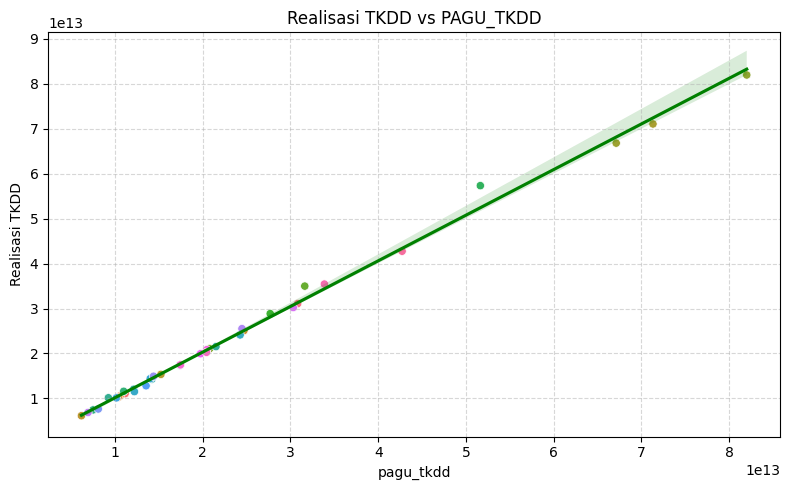

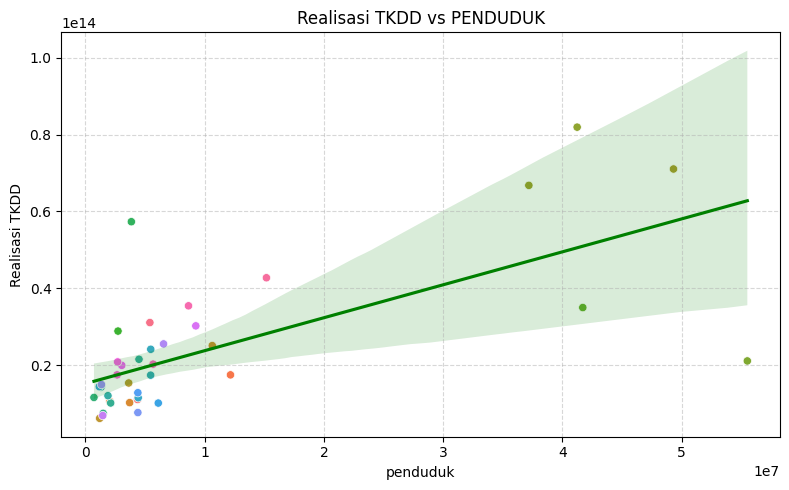

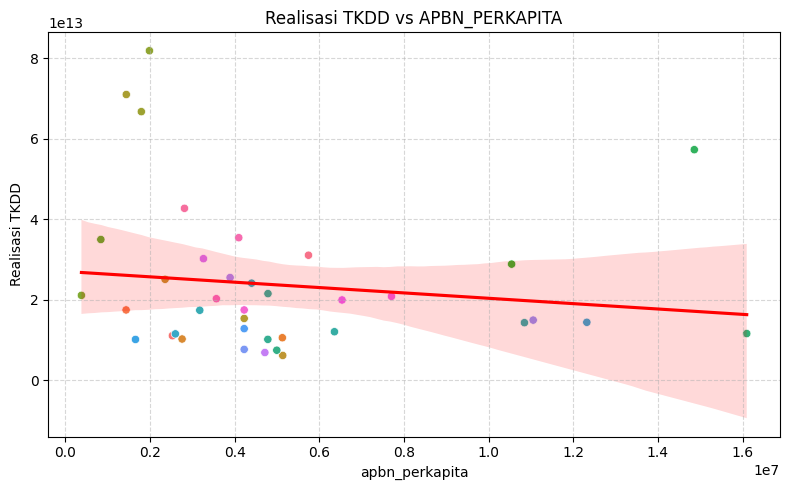

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

selected_features = ['pagu_tkdd', 'penduduk',  'apbn_perkapita']

# Menghitung korelasi untuk menentukan warna garis regresi
correlations = df[selected_features + ['realisasi_tkdd']].corr()['realisasi_tkdd']

for feat in selected_features:
    plt.figure(figsize=(8, 5))
    sns.scatterplot(data=df, x=feat, y='realisasi_tkdd', hue='provinsi', legend=False)

    # Menentukan warna garis regresi berdasarkan korelasi
    reg_color = 'green' if correlations[feat] > 0 else 'red'

    sns.regplot(data=df, x=feat, y='realisasi_tkdd', scatter=False, color=reg_color)
    plt.title(f'Realisasi TKDD vs {feat.upper()}')
    plt.xlabel(feat)
    plt.ylabel('Realisasi TKDD')
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

1. Realisasi TKDD vs PAGU_TKDD:
  - Plot: Titik-titik tersebar sangat dekat di sekitar garis lurus yang menanjak tajam. Garis regresi berwarna hijau.
  - Hasil: Ini menunjukkan korelasi positif yang sangat kuat antara Pagu TKDD dan Realisasi TKDD. Semakin besar pagu anggaran yang ditetapkan, semakin besar pula realisasi anggaran yang dicapai. Garis hijau menegaskan hubungan positif ini. Ini adalah temuan yang diharapkan dan logis.
2. Realisasi TKDD vs PENDUDUK:
  - Plot: Titik-titik menunjukkan tren umum yang menanjak, meskipun sebarannya lebih luas dibandingkan plot Pagu TKDD. Garis regresi berwarna hijau.
  - Hasil: Ada korelasi positif yang cukup kuat antara Jumlah Penduduk dan Realisasi TKDD. Provinsi dengan jumlah penduduk yang lebih besar cenderung memiliki realisasi TKDD yang lebih tinggi. Garis hijau menunjukkan tren positif ini. Ini mungkin terkait dengan alokasi TKDD yang seringkali memperhitungkan faktor populasi.
3. Realisasi TKDD vs APBN_PERKAPITA:
  - Plot: Titik-titik tersebar cukup acak, dan garis regresi cenderung sedikit menurun. Garis regresi berwarna merah.
  - Hasil: Ada korelasi negatif yang lemah antara Anggaran APBN per Kapita dan Realisasi TKDD. Provinsi dengan anggaran APBN per kapita yang lebih tinggi cenderung memiliki sedikit lebih rendah realisasi TKDD-nya, meskipun hubungannya tidak kuat. Garis merah menunjukkan arah negatif yang lemah in

## 4. Apakah terdapat hubungan antara realisasi TKDD dan IPM suatu provinsi?

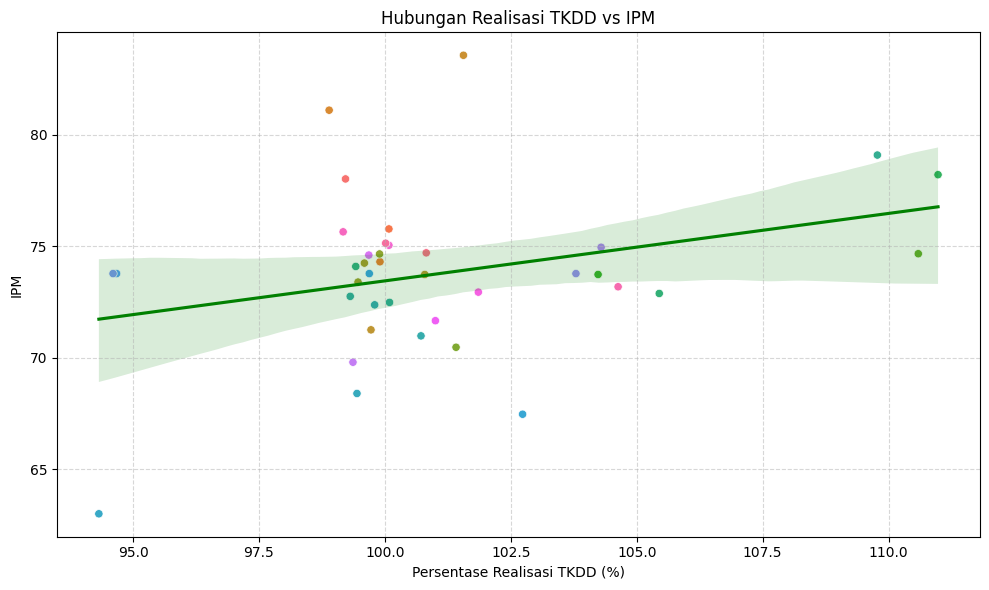

In [53]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='persentase_realisasi', y='ipm', hue='provinsi', legend=False)
sns.regplot(data=df, x='persentase_realisasi', y='ipm', scatter=False, color='green')
plt.title('Hubungan Realisasi TKDD vs IPM')
plt.xlabel('Persentase Realisasi TKDD (%)')
plt.ylabel('IPM')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


- Plot: Titik-titik tersebar lebih acak, dan garis regresi cenderung datar atau sedikit menanjak. Garis regresi berwarna hijau (karena korelasinya positif, meskipun lemah).
- Hasil: Korelasi antara IPM dan Realisasi TKDD sangat lemah dan positif. Ini berarti tingkat pembangunan manusia (IPM) suatu provinsi tidak memiliki hubungan linier yang kuat dengan jumlah Realisasi TKDD-nya. Garis hijau menunjukkan arah positif yang sangat lemah.

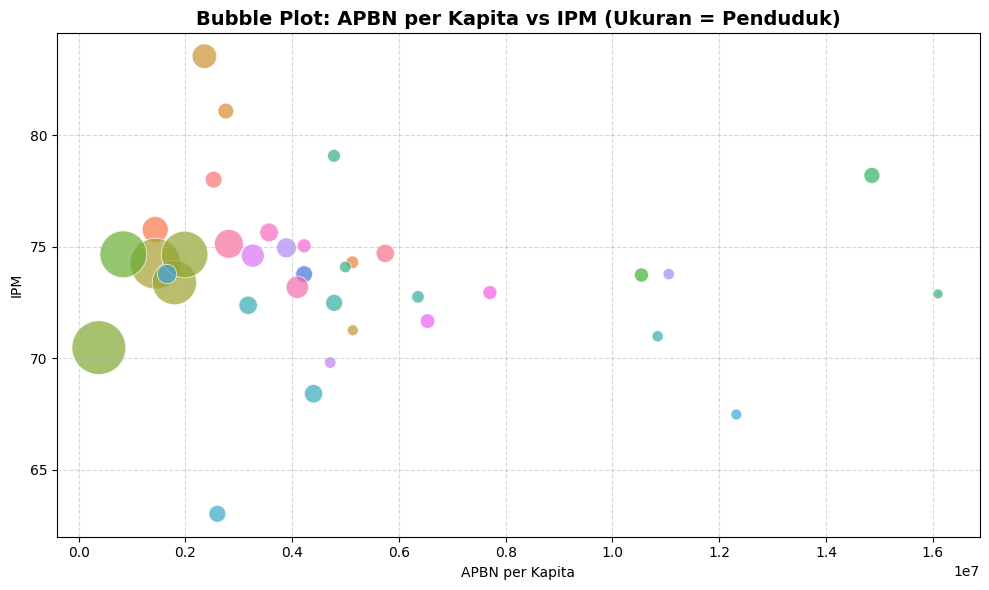

In [54]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='apbn_perkapita',
    y='ipm',
    size='penduduk',
    hue='provinsi',
    data=df,
    sizes=(50, 1500),
    legend=False,
    alpha=0.7
)
plt.title('Bubble Plot: APBN per Kapita vs IPM (Ukuran = Penduduk)', fontsize=14, weight='bold')
plt.xlabel('APBN per Kapita')
plt.ylabel('IPM')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


Secara umum, ada kecenderungan (meskipun tidak sangat kuat) bahwa provinsi dengan Anggaran APBN per Kapita yang lebih tinggi cenderung memiliki IPM yang sedikit lebih tinggi. Garis regresi (meskipun tidak ditampilkan di bubble plot ini, tetapi terlihat di scatterplot sebelumnya) menunjukkan hubungan positif yang lemah ini.

## 5. Apa saja faktor-faktor yang memengaruhi IPM di tiap provinsi Indonesia pada tahun 2023?

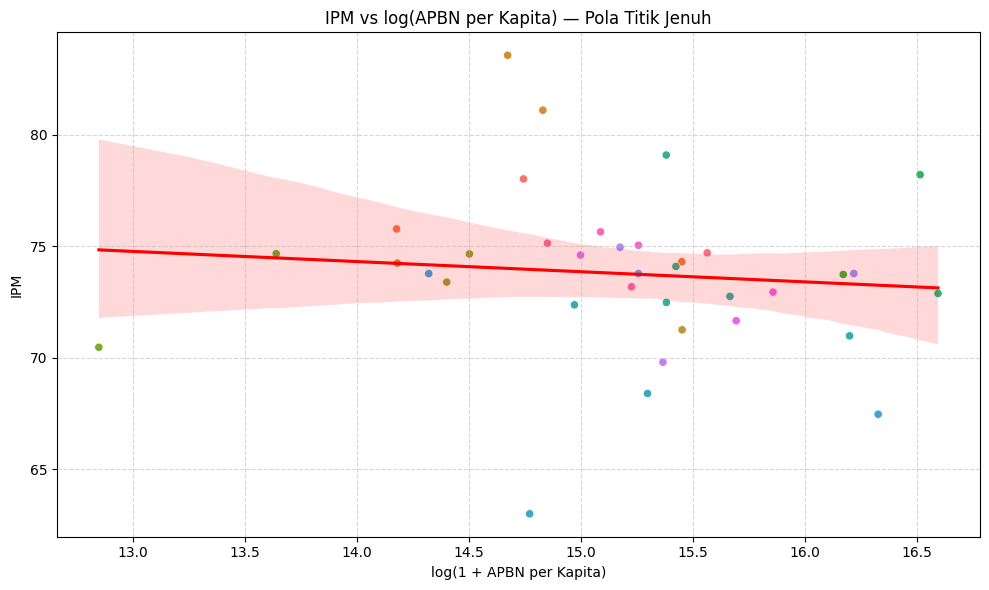

In [55]:
import numpy as np

plt.figure(figsize=(10, 6))
sns.scatterplot(x=np.log1p(df['apbn_perkapita']), y=df['ipm'], hue='provinsi', legend=False, data=df)
sns.regplot(x=np.log1p(df['apbn_perkapita']), y=df['ipm'], scatter=False, color='red')
plt.title('IPM vs log(APBN per Kapita) — Pola Titik Jenuh')
plt.xlabel('log(1 + APBN per Kapita)')
plt.ylabel('IPM')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

- Hubungan Positif Awal: Pada nilai log(APBN per Kapita) yang rendah, terlihat ada tren peningkatan IPM seiring dengan peningkatan anggaran per kapita. Garis regresi cenderung menanjak di bagian kiri plot.
- Pola Titik Jenuh (Saturation Point): Seiring dengan peningkatan nilai log(APBN per Kapita) ke titik tertentu, peningkatan IPM menjadi melambat atau bahkan mendatar. Ini yang disebut "pola titik jenuh". Artinya, di atas ambang batas anggaran per kapita tertentu, penambahan anggaran mungkin tidak lagi menghasilkan peningkatan IPM yang signifikan. Faktor lain mungkin menjadi lebih dominan dalam memengaruhi IPM di provinsi-provinsi dengan anggaran per kapita yang sudah tinggi.
- Sebaran Titik: Meskipun ada tren umum, titik-titik (provinsi) tersebar di sekitar garis regresi. Ini menunjukkan bahwa Anggaran APBN per Kapita (bahkan setelah transformasi log) bukan satu-satunya faktor yang mempengaruhi IPM. Ada variabel lain yang berperan dalam menentukan IPM suatu provinsi, yang menjelaskan mengapa ada provinsi dengan log(APBN per Kapita) yang serupa tetapi IPM yang berbeda, atau sebaliknya.

/tmp/ipython-input-2402875868.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_resilient, x='ipm_per_miskin', y='provinsi', palette='PuRd_r')


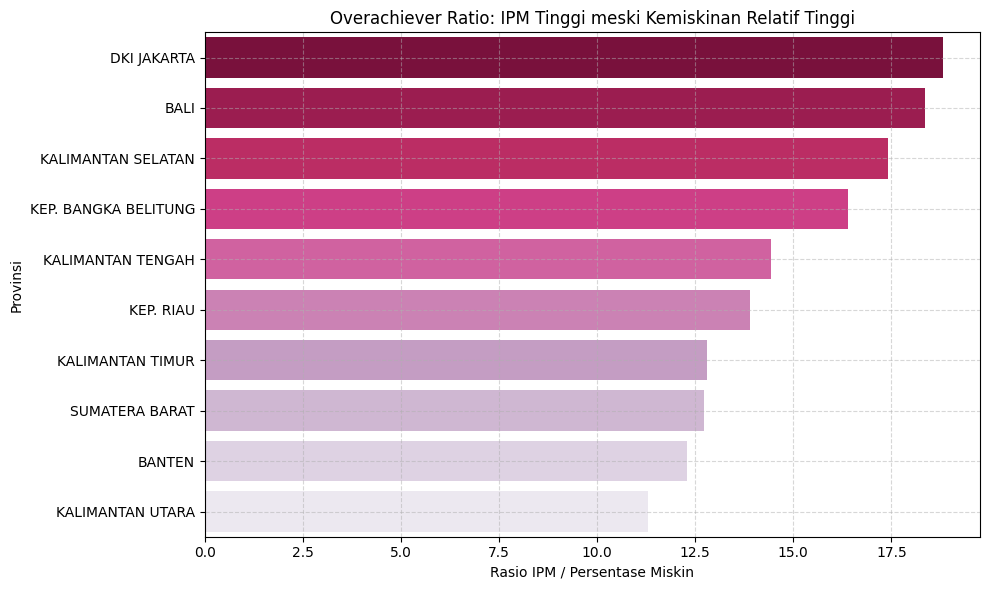

In [56]:
# Membuat rasio IPM / kemiskinan
df['ipm_per_miskin'] = df['ipm'] / df['persen_miskin']

top_resilient = df.sort_values('ipm_per_miskin', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(data=top_resilient, x='ipm_per_miskin', y='provinsi', palette='PuRd_r')
plt.title('Overachiever Ratio: IPM Tinggi meski Kemiskinan Relatif Tinggi')
plt.xlabel('Rasio IPM / Persentase Miskin')
plt.ylabel('Provinsi')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


- Provinsi-provinsi dengan rasio ipm_per_miskin tertinggi (yang bisa dianggap sebagai "Overachiever" atau provinsi yang berhasil mencapai IPM tinggi meskipun ada kemiskinan) adalah:

  - DKI JAKARTA
  - BALI
  - KALIMANTAN SELATAN
  - KEP. BANGKA BELITUNG
  - KALIMANTAN TENGAH
  - KEP. RIAU
  - KALIMANTAN TIMUR
  - SUMATERA BARAT
  - BANTEN
  - KALIMANTAN UTARA
  
Plot ini menyoroti provinsi-provinsi yang berhasil mempertahankan atau mencapai IPM yang baik meskipun memiliki tingkat kemiskinan tertentu. Ini bisa mengindikasikan efektivitas program pembangunan, alokasi sumber daya yang tepat sasaran, atau faktor-faktor lain yang membantu meningkatkan kualitas hidup penduduk terlepas dari tantangan ekonomi.

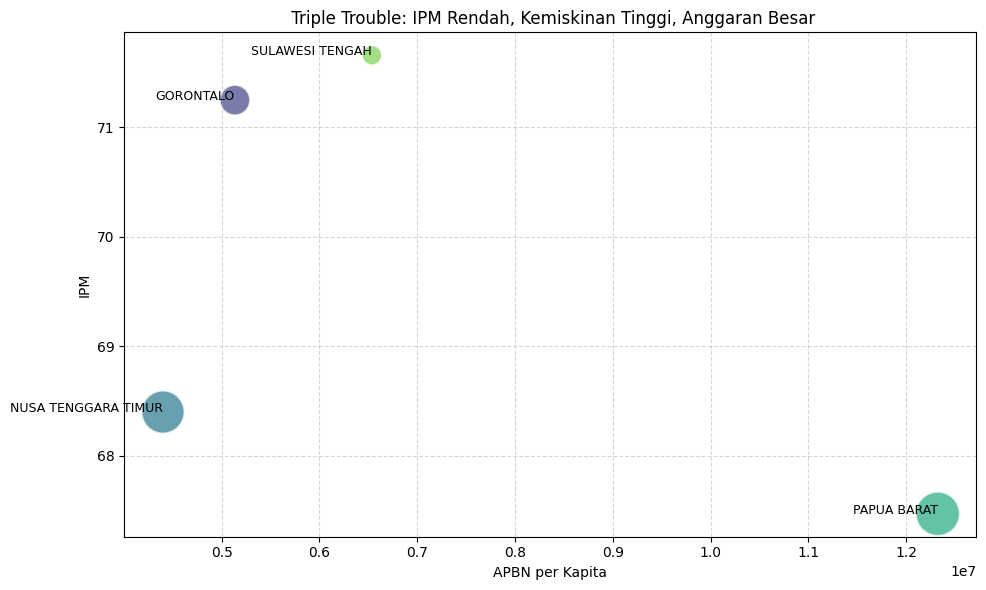

In [57]:
# Menggunakan df[trouble] dari sebelumnya
trouble = df[
    (df['ipm'] < df['ipm'].quantile(0.25)) &
    (df['persen_miskin'] > df['persen_miskin'].quantile(0.75)) &
    (df['apbn_perkapita'] > df['apbn_perkapita'].median())
]

plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=trouble,
    x='apbn_perkapita',
    y='ipm',
    size='persen_miskin',
    sizes=(200, 1000),
    hue='provinsi',
    legend=False,
    alpha=0.7,
    palette='viridis'
)

for i in range(len(trouble)):
    plt.text(trouble['apbn_perkapita'].iloc[i], trouble['ipm'].iloc[i],
             trouble['provinsi'].iloc[i], fontsize=9, ha='right')

plt.title(' Triple Trouble: IPM Rendah, Kemiskinan Tinggi, Anggaran Besar')
plt.xlabel('APBN per Kapita')
plt.ylabel('IPM')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

- Plot ini secara visual mengidentifikasi provinsi-provinsi yang, meskipun menerima alokasi Anggaran APBN per Kapita yang relatif besar (di atas median), masih menghadapi tantangan serius dalam hal pembangunan manusia (IPM rendah) dan kemiskinan (persentase kemiskinan tinggi).

- Berdasarkan kriteria tersebut dan visualisasi, provinsi-provinsi yang masuk kategori "Triple Trouble" ini adalah:

  - GORONTALO
  - NUSA TENGGARA TIMUR
  - PAPUA BARAT
  - SULAWESI TENGAH

- Provinsi-provinsi ini layak mendapat perhatian khusus untuk studi lebih lanjut guna memahami mengapa alokasi anggaran yang relatif besar belum berdampak signifikan pada peningkatan IPM dan penurunan kemiskinan di wilayah tersebut. Faktor-faktor lain di luar besaran anggaran mungkin memainkan peran penting, seperti efektivitas program, kondisi geografis, tata kelola, atau tantangan sosial/budaya yang spesifik.

# **INSIGHT**

## Insight 1: Realisasi TKDD Belum Merata dan Tidak Semua Daerah Efisien
- Hasil perhitungan persentase_realisasi menunjukkan bahwa beberapa provinsi masih memiliki serapan di bawah 90%, yang berarti belum mampu menggunakan dana TKDD secara optimal.

- Beberapa daerah bahkan mencapai lebih dari 100%, yang mungkin menunjukkan revisi anggaran atau tambahan transfer.

Contoh: Papua Pegunungan memiliki realisasi rendah, sedangkan Kalimantan Timur memiliki realisasi tertinggi.



## Insight 2: Dana Besar Tidak Selalu Menghasilkan IPM Tinggi
- Dari scatterplot dan regresi APBN per kapita vs IPM, terlihat bahwa provinsi dengan anggaran besar (seperti Papua, Papua Pegunungan) tidak otomatis menghasilkan IPM tinggi.

- Sebaliknya, DIY dan Kepulauan Riau memiliki IPM tinggi meskipun APBN per kapita relatif kecil.

Ini menunjukkan bahwa efektivitas anggaran lebih penting daripada jumlah anggaran itu sendiri.

##  Insight 3: Realisasi TKDD Tidak Berhubungan Langsung dengan IPM
- Korelasi dan scatterplot menunjukkan bahwa tingkat realisasi TKDD tidak berkorelasi kuat dengan IPM.

- Artinya, penyerapan anggaran saja belum cukup untuk meningkatkan kualitas hidup jika programnya tidak tepat sasaran.



## Insight 4: Ketimpangan Pembangunan Antar Wilayah Masih Tinggi
- Provinsi dengan PDRB per kapita tinggi seperti Kalimantan Timur masih mencatatkan persentase kemiskinan yang tinggi.

- Ini menunjukkan kesenjangan distribusi kekayaan daerah dan kemungkinan capital outflow atau proyek non-inklusif.

## Insight 5: Terdapat Pola Titik Jenuh Pengaruh Anggaran terhadap IPM
- Regresi log menunjukkan bahwa penambahan APBN per kapita hanya berdampak signifikan sampai titik tertentu.

- Setelah itu, efek kenaikan IPM mulai stagnan → menunjukkan titik jenuh anggaran sosial.

##  Insight 6: Triple Trouble Daerah: IPM Rendah + Miskin Tinggi + Dana Besar
- Ditemukan sejumlah provinsi dengan kondisi:

  - IPM rendah

  - Persentase kemiskinan tinggi

  - APBN per kapita besar

Provinsi seperti  GORONTALO, NUSA TENGGARA TIMUR, PAPUA BARAT termasuk dalam kategori ini.

# RECOMMENDATION

##  1. Prioritaskan Efektivitas, Bukan Sekadar Penambahan Dana
- Dana besar tanpa eksekusi dan program yang tepat hanya akan membuang anggaran.

- Terapkan result-based budgeting dan evaluasi output berbasis indikator sosial (IPM, kemiskinan).

## 2. Replikasi Model Provinsi Efisien
- Studi kasus pada DIY dan Kep. Riau dapat dijadikan acuan nasional.

- Lakukan benchmarking terhadap program yang berhasil dengan dana terbatas.

##  3. Intervensi Khusus untuk Provinsi “Triple Trouble”
- Untuk daerah dengan anggaran tinggi, kemiskinan tinggi, dan IPM rendah:

  - Terapkan pendampingan intensif

  - Tingkatkan kapasitas manajemen fiskal daerah

  - Fokus pada sektor dasar: pendidikan, kesehatan, dan sanitasi

## 4. Bangun Sistem Pemantauan Realisasi Berbasis Kinerja
- Integrasikan sistem pelaporan realisasi TKDD dengan:

  - Capaian pembangunan SDM (IPM)

  - Indikator kemiskinan dan ekonomi mikro

- Buat dashboard daerah untuk pemantauan publik.

## 5. Desain Ulang Alokasi TKDD Berdasarkan Kinerja Historis
- Jika daerah terbukti tidak mampu menyerap dan mengelola TKDD secara efisien,  perlu dilakukan:

  - Penyesuaian alokasi

  - Pendampingan teknis dan keuangan

  - Sanksi administratif terhadap pelanggaran atau stagnasi

##  6. Pentingnya Analisis Titik Jenuh
- Setelah titik tertentu, menambah dana tidak lagi meningkatkan IPM.

- Fokus ke penguatan kelembagaan, bukan hanya keuangan:

  - Reformasi birokrasi

  - Pelatihan SDM daerah

  - Penyederhanaan proses lelang dan pelaksanaan